# Stochastic Multi-Armed Bandits on Simulated Data

## Q1- Parametric bandits

In [1]:
import numpy as np
import arms
import matplotlib
import matplotlib.pyplot as plt
from utils import UCB1,TS

means: [0.25, 0.6, 0.55, 0.5]


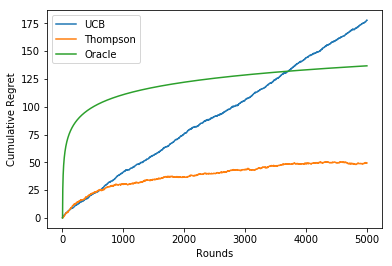

In [3]:
%matplotlib inline
# Build your own bandit problem

# this is an example, please change the parameters or arms!
arm1 = arms.ArmBernoulli(0.25, random_state=np.random.randint(1, 312414))
arm2 = arms.ArmBernoulli(0.6, random_state=np.random.randint(1, 312414))
arm3 = arms.ArmBernoulli(0.55, random_state=np.random.randint(1, 312414))
arm4 = arms.ArmBernoulli(0.5, random_state=np.random.randint(1, 312414))


MAB = [arm1, arm2, arm3, arm4]

# bandit : set of arms

nb_arms = len(MAB)
means = [el.mean for el in MAB]

# Display the means of your bandit (to find the best)
print('means: {}'.format(means))
mu_max = np.max(means)

# Comparison of the regret on one run of the bandit algorithm
# try to run this multiple times, you should observe different results

T = 5000  # horizon
nb_simu = 50
reg1,reg2 = 0,0

for _ in range(nb_simu):
    rew1, draws1 = UCB1(T, MAB) # rew is reward
    reg1 += 1/nb_simu*(mu_max * np.arange(1, T + 1) - np.cumsum(rew1))
    rew2, draws2 = TS(T, MAB)
    reg2 += 1/nb_simu*(mu_max * np.arange(1, T + 1) - np.cumsum(rew2))

best_arm = np.argmax(means)
MAB_filtered = list(set(MAB).difference(set([MAB[best_arm]])))

def KL(x,y):
	output = x*np.log(x/y) + (1-x)*np.log((1-x)/(1-y))
	return output

C_p = np.sum([(mu_max - el.mean)/KL(mu_max,el.mean) for el in MAB_filtered])
oracle_regret = [C_p*np.log(t) for t in range(1,T+1)]


plt.figure(1)
x = np.arange(1, T+1)
plt.plot(x, reg1, label='UCB')
plt.plot(x, reg2, label='Thompson')
plt.plot(x,oracle_regret, label = 'Oracle')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.show()

means: [0.15, 0.42, 0.2, 0.25, 0.1, 0.2]


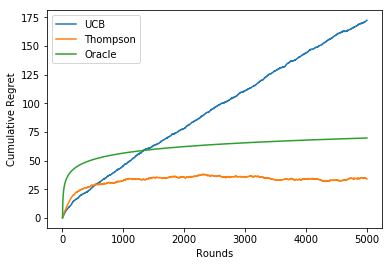

In [2]:
# this is an example, please change the parameters or arms!
arm1 = arms.ArmBernoulli(0.15, random_state=np.random.randint(1, 312414))
arm2 = arms.ArmBernoulli(0.42, random_state=np.random.randint(1, 312414))
arm3 = arms.ArmBernoulli(0.2, random_state=np.random.randint(1, 312414))
arm4 = arms.ArmBernoulli(0.25, random_state=np.random.randint(1, 312414))
arm5 = arms.ArmBernoulli(0.1, random_state=np.random.randint(1, 312414))
arm6 = arms.ArmBernoulli(0.2, random_state=np.random.randint(1, 312414))

MAB = [arm1, arm2, arm3, arm4,arm5,arm6]

# bandit : set of arms

nb_arms = len(MAB)
means = [el.mean for el in MAB]

# Display the means of your bandit (to find the best)
print('means: {}'.format(means))
mu_max = np.max(means)

# Comparison of the regret on one run of the bandit algorithm
# try to run this multiple times, you should observe different results

T = 5000  # horizon
nb_simu = 50
reg1,reg2 = 0,0

for _ in range(nb_simu):
    rew1, draws1 = UCB1(T, MAB) # rew is reward
    reg1 += 1/nb_simu*(mu_max * np.arange(1, T + 1) - np.cumsum(rew1))
    rew2, draws2 = TS(T, MAB)
    reg2 += 1/nb_simu*(mu_max * np.arange(1, T + 1) - np.cumsum(rew2))

best_arm = np.argmax(means)
MAB_filtered = list(set(MAB).difference(set([MAB[best_arm]])))

def KL(x,y):
	output = x*np.log(x/y) + (1-x)*np.log((1-x)/(1-y))
	return output

C_p = np.sum([(mu_max - el.mean)/KL(mu_max,el.mean) for el in MAB_filtered])
oracle_regret = [C_p*np.log(t) for t in range(1,T+1)]


plt.figure(1)
x = np.arange(1, T+1)
plt.plot(x, reg1, label='UCB')
plt.plot(x, reg2, label='Thompson')
plt.plot(x,oracle_regret, label = 'Oracle')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.show()

## Q2 - Non-parametric bandits

In [ ]:
arm1 = arms.ArmExp(5, random_state=np.random.randint(1, 312414))
arm2 = arms.ArmExp(10, random_state=np.random.randint(1, 312414))
arm3 = arms.ArmBeta(4,7, random_state=np.random.randint(1, 312414))
arm4 = arms.ArmExp(1, random_state=np.random.randint(1, 312414))

MAB = [arm1, arm2, arm3, arm4]

# bandit : set of arms

nb_arms = len(MAB)
means = [el.mean for el in MAB]

# Display the means of your bandit (to find the best)
print('means: {}'.format(means))
mu_max = np.max(means)

## Tomson sampling adapted to non-Bernoulli arms

In [ ]:
def TS(T,MAB):
	"""
	T : Horizon
	MAB : list of arms
	n_simu : number of simulations
	"""

	rews = np.zeros(T)
	draws = np.zeros(T)

	K = len(MAB)

	nb_pulls = [1]*len(MAB)
	cumreward_arm = []

	for k in range(K):
		reward = int(MAB[k].sample())
		cumreward_arm.append(reward)

	for t in range(1,T+1): 

		mu = [np.random.beta(cumreward_arm[i]+1,nb_pulls[i]-cumreward_arm[i]+1) for i in range(len(MAB))]

		best_arm = np.argmax(mu)

		sample = MAB[best_arm].sample()

		if isinstance(sample,bool):
			reward = int(sample)
			success = reward
		else:
			reward = sample[0]
			arms_object = arms.ArmBernoulli(p = reward)
			success = int(arms_object.sample())

		#Update
		nb_pulls[best_arm] += 1
		cumreward_arm[best_arm] += success

		rews[t-1] = reward
		draws[t-1] = best_arm

	return rews,draws


means: [0.19321634509369576, 0.09995459800899031, 0.36363636363636365, 0.41802329313067355]


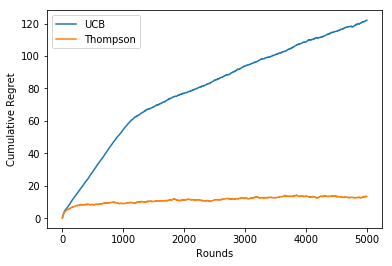

In [2]:
# Comparison of the regret on one run of the bandit algorithm
# try to run this multiple times, you should observe different results

T = 5000  # horizon
nb_simu = 50
reg1,reg2 = 0,0

for _ in range(nb_simu):
    rew1, draws1 = UCB1(T, MAB) # rew is reward
    reg1 += 1/nb_simu*(mu_max * np.arange(1, T + 1) - np.cumsum(rew1))
    rew2, draws2 = TS(T, MAB)
    reg2 += 1/nb_simu*(mu_max * np.arange(1, T + 1) - np.cumsum(rew2))


plt.figure(1)
x = np.arange(1, T+1)
plt.plot(x, reg1, label='UCB')
plt.plot(x, reg2, label='Thompson')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.show()

# Linear Bandit on Real Data 

In [1]:
import numpy as np
from linearmab_models import ToyLinearModel, ColdStartMovieLensModel
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import time
random_state = np.random.randint(0, 24532523)

In [2]:
model = ColdStartMovieLensModel(
    random_state=random_state,
    noise=0.1)

n_a = model.n_actions
print('number of actions ',n_a)
d = model.n_features

T = 6000

nb_simu = 20 # you may want to change this!

number of actions  207


In [5]:
def LinearUCB(features,previous_rewards,previous_actions,alpha,lambda_,eps_greedy,epsilon = None,d=d,n_a=n_a):
    """
    Parameters
    ------------
    features : features of the movies
    previous_rewards  : rewards received up to time t 
    previous_actions : actions taken up to time t
    alpha : beta parameter
    lambda_ : regularization parameter for Ridge
    eps_greedy : Use eps-greedy strategy if True
    epsilon : parameter of eps-greedy strategy
    d : dimension of the features
    """

    Z = features[previous_actions]

    y = previous_rewards

    M_inv = np.linalg.inv((Z.T)@Z + lambda_*np.identity(d))
    
    theta_hat = np.dot(M_inv@(Z.T),y)
    
    beta = [alpha*np.sqrt(np.dot(features[action_],np.dot(M_inv,features[action_]))) for action_ in range(len(features))]

    if eps_greedy:
        if random.uniform(0,1) > epsilon:
            action = np.argmax([np.dot(features[action_],theta_hat) + beta[action_] for action_ in range(len(features))])
        else:
            action = np.random.choice(list(range(len(features))))

    else:
        action = np.argmax([np.dot(features[action_],theta_hat) + beta[action_] for action_ in range(len(features))])

    return action,theta_hat

In [12]:
from sklearn.model_selection import ParameterSampler,ParameterGrid

# param_grid = {'alpha': np.concatenate([np.random.uniform(low = 0.01,high = 1,size = 25),np.random.uniform(low = 1,high = 10,size = 25)]),
#                                     'lambda': np.random.uniform(low = 0.001,high = 1,size = 50)}

# n_iter = 5
# np.random.seed(42)
# param_list = list(ParameterSampler(param_grid, n_iter=n_iter,random_state = 42))


param_grid = {'alpha': np.array([0.01,0.1,0.5,1,5,10,12,15,20,25]),
              'lambda': np.array([0.01])}

param_list = list(ParameterGrid(param_grid))

regret = np.zeros((n_iter,nb_simu, T))
norm_dist = np.zeros((n_iter,nb_simu, T))

alg_name = 'LinearUCB'

In [13]:
for i in range(len(param_list)):

    for k in tqdm(range(nb_simu), desc="Simulating {}".format(alg_name)):
        actions = [np.random.choice(list(range(d)))]
        rewards = [model.reward(actions[0])]
        for t in range(T):
            if alg_name == 'LinearUCB':
                a_t,theta_hat = LinearUCB(model.features,rewards,actions,param_list[i]['alpha'],param_list[i]["lambda"],False)
                norm_dist[i, k, t] = np.linalg.norm(theta_hat - model.real_theta, 2)

            elif alg_name == 'Random':
                a_t = np.random.choice(list(range(n_a)))

            elif alg_name == 'Eps_Greedy':
                a_t,theta_hat = LinearUCB(model.features,rewards,actions,param_list[i]['alpha'],param_list[i]["lambda"],True,0.1)

                norm_dist[i, k, t] = np.linalg.norm(theta_hat - model.real_theta, 2)
                
            r_t = model.reward(a_t) # get the reward

            # update algorithm
            actions.append(a_t)
            rewards.append(r_t)

            # store regret
            regret[i, k, t] = model.best_arm_reward() - r_t

Simulating LinearUCB: 100%|████████████████████████████████████████████████████████████| 20/20 [10:30<00:00, 31.20s/it]


In [11]:
# compute average (over sim) of the algorithm performance and plot it
for i in range(len(param_list)):

    mean_regret = np.mean(regret[i],axis = 0)

    if alg_name == 'LinearUCB' or alg_name == 'Eps_Greedy':

        mean_norms = np.mean(norm_dist[i],axis = 0)

        plt.figure(1)
        plt.subplot(121)
        plt.plot(mean_norms, label=alg_name+' for alpha = {0:.2f} and lambda = {1:.2f}'.format(param_list[i]['alpha'],param_list[i]['lambda']))
        plt.ylabel('d(theta, theta_hat)')
        plt.xlabel('Rounds')
        plt.legend()

        plt.subplot(122)
        plt.plot(mean_regret.cumsum(), label=alg_name+' for alpha = {0:.2f} and lambda = {1:.2f}'.format(param_list[i]['alpha'],param_list[i]['lambda']))
        plt.ylabel('Cumulative Regret')
        plt.xlabel('Rounds')
        plt.legend()
        plt.savefig('C:/Users/Idriss/Desktop/3A/MVA/RL/TPs/TP2/TP2_python/'+alg_name+' graph for alpha ='+str(round(param_list[i]['alpha'],2))+' and lambda ='+str(round(param_list[i]["lambda"],2))+'.jpg')
        plt.close()
    else:
        plt.plot(mean_regret.cumsum(), label=alg_name)
        plt.ylabel('Cumulative Regret')
        plt.xlabel('Rounds')
        plt.legend()
        plt.savefig('C:/Users/Idriss/Desktop/3A/MVA/RL/TPs/TP2/TP2_python/'+alg_name+'.jpg')
        plt.close()

**According to the plots available in the folder Plots_, we choose lambda = 0.01 and alpha = 0.1**

### Linear UCB

In [14]:
alg_name = 'LinearUCB'

regret = np.zeros((nb_simu, T))
norm_dist = np.zeros((nb_simu, T))

In [15]:
for k in tqdm(range(nb_simu), desc="Simulating {}".format(alg_name)):
        actions = [np.random.choice(list(range(d)))]
        rewards = [model.reward(actions[0])]
        for t in range(T):
            if alg_name == 'LinearUCB':
                a_t,theta_hat = LinearUCB(model.features,rewards,actions,0.1,0.01,False)
                norm_dist[k, t] = np.linalg.norm(theta_hat - model.real_theta, 2)

            elif alg_name == 'Random':
                a_t = np.random.choice(list(range(n_a)))

            elif alg_name == 'Eps_Greedy':
                a_t,theta_hat = LinearUCB(model.features,rewards,actions,0.1,0.01,True,0.1)

                norm_dist[k, t] = np.linalg.norm(theta_hat - model.real_theta, 2)
                
            r_t = model.reward(a_t) # get the reward

            # update algorithm
            actions.append(a_t)
            rewards.append(r_t)

            # store regret
            regret[k, t] = model.best_arm_reward() - r_t

Simulating LinearUCB: 100%|████████████████████████████████████████████████████████████| 20/20 [11:13<00:00, 35.14s/it]


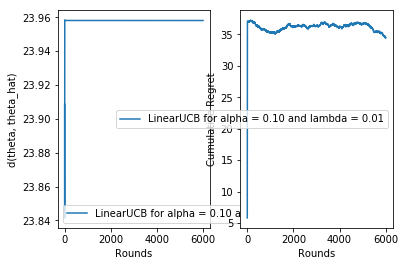

In [16]:
mean_regret = np.mean(regret,axis = 0)
mean_norms = np.mean(norm_dist,axis = 0)
plt.figure(1)
plt.subplot(121)
plt.plot(mean_norms, label=alg_name+' for alpha = {0:.2f} and lambda = {1:.2f}'.format(0.1,0.01))
plt.ylabel('d(theta, theta_hat)')
plt.xlabel('Rounds')
plt.legend()

plt.subplot(122)
plt.plot(mean_regret.cumsum(), label=alg_name+' for alpha = {0:.2f} and lambda = {1:.2f}'.format(0.1,0.01))
plt.ylabel('Cumulative Regret')
plt.xlabel('Rounds')
plt.legend()
plt.show()

### Eps-greedy

In [3]:
alg_name = 'Eps_Greedy'

regret = np.zeros((nb_simu, T))
norm_dist = np.zeros((nb_simu, T))

In [7]:
for k in tqdm(range(nb_simu), desc="Simulating {}".format(alg_name)):
        actions = [np.random.choice(list(range(d)))]
        rewards = [model.reward(actions[0])]
        for t in range(T):
            if alg_name == 'LinearUCB':
                a_t,theta_hat = LinearUCB(model.features,rewards,actions,0.1,0.01,False)
                norm_dist[k, t] = np.linalg.norm(theta_hat - model.real_theta, 2)

            elif alg_name == 'Random':
                a_t = np.random.choice(list(range(n_a)))

            elif alg_name == 'Eps_Greedy':
                a_t,theta_hat = LinearUCB(model.features,rewards,actions,0.1,0.01,True,0.1)

                norm_dist[k, t] = np.linalg.norm(theta_hat - model.real_theta, 2)
                
            r_t = model.reward(a_t) # get the reward

            # update algorithm
            actions.append(a_t)
            rewards.append(r_t)

            # store regret
            regret[k, t] = model.best_arm_reward() - r_t

Simulating Eps_Greedy: 100%|███████████████████████████████████████████████████████████| 20/20 [11:16<00:00, 32.45s/it]


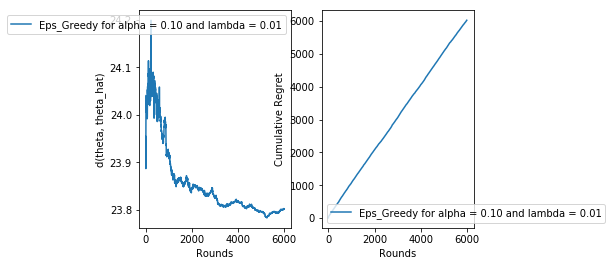

In [9]:
mean_regret = np.mean(regret,axis = 0)
mean_norms = np.mean(norm_dist,axis = 0)
plt.figure(1)
plt.subplot(121)
plt.plot(mean_norms, label=alg_name+' for alpha = {0:.2f} and lambda = {1:.2f}'.format(0.1,0.01))
plt.ylabel('d(theta, theta_hat)')
plt.xlabel('Rounds')
plt.legend()

plt.subplot(122)
plt.plot(mean_regret.cumsum(), label=alg_name+' for alpha = {0:.2f} and lambda = {1:.2f}'.format(0.1,0.01))
plt.ylabel('Cumulative Regret')
plt.xlabel('Rounds')
plt.legend()
plt.show()

### Random

In [17]:
alg_name = 'Random'

regret = np.zeros((nb_simu, T))
norm_dist = np.zeros((nb_simu, T))

In [18]:
for k in tqdm(range(nb_simu), desc="Simulating {}".format(alg_name)):
        actions = [np.random.choice(list(range(d)))]
        rewards = [model.reward(actions[0])]
        for t in range(T):
            if alg_name == 'LinearUCB':
                a_t,theta_hat = LinearUCB(model.features,rewards,actions,0.1,0.01,False)
                norm_dist[k, t] = np.linalg.norm(theta_hat - model.real_theta, 2)

            elif alg_name == 'Random':
                a_t = np.random.choice(list(range(n_a)))

            elif alg_name == 'Eps_Greedy':
                a_t,theta_hat = LinearUCB(model.features,rewards,actions,0.1,0.01,True,0.1)

                norm_dist[k, t] = np.linalg.norm(theta_hat - model.real_theta, 2)
                
            r_t = model.reward(a_t) # get the reward

            # update algorithm
            actions.append(a_t)
            rewards.append(r_t)

            # store regret
            regret[k, t] = model.best_arm_reward() - r_t

Simulating Random: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:06<00:00,  3.18it/s]


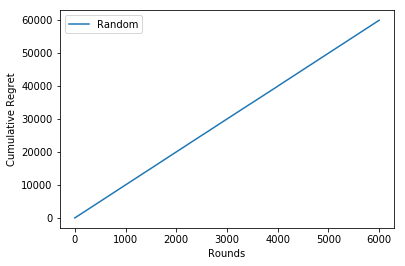

In [19]:
mean_regret = np.mean(regret,axis = 0)
mean_norms = np.mean(norm_dist,axis = 0)

plt.plot(mean_regret.cumsum(), label=alg_name)
plt.ylabel('Cumulative Regret')
plt.xlabel('Rounds')
plt.legend()
plt.show()